# EDA on Session Summary Data : DS203 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\m5cg1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668 entries, 0 to 667
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SerialNo         668 non-null    int64 
 1   Session_Summary  668 non-null    object
dtypes: int64(1), object(1)
memory usage: 10.6+ KB
None
0 null values
1 duplicates
        char_count   word_count
count   668.000000   668.000000
mean   1304.393713   210.477545
std     882.915206   146.189925
min      27.000000     1.000000
25%     725.750000   113.000000
50%    1102.500000   174.500000
75%    1611.750000   268.000000
max    9181.000000  1384.000000


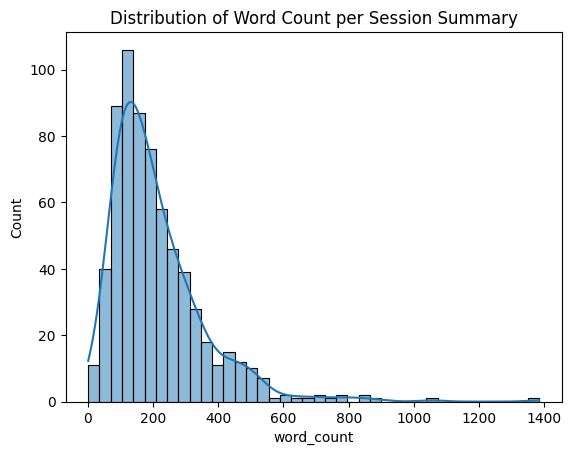

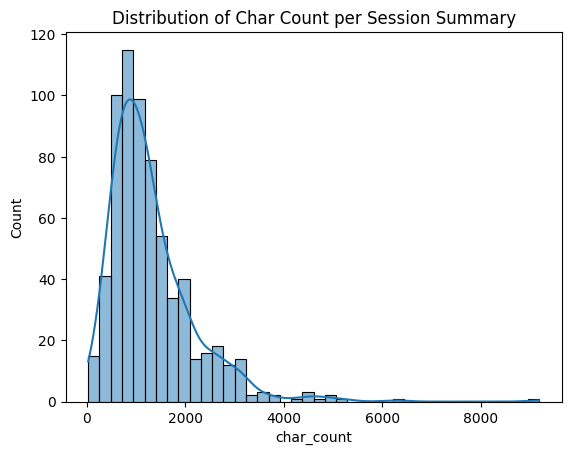

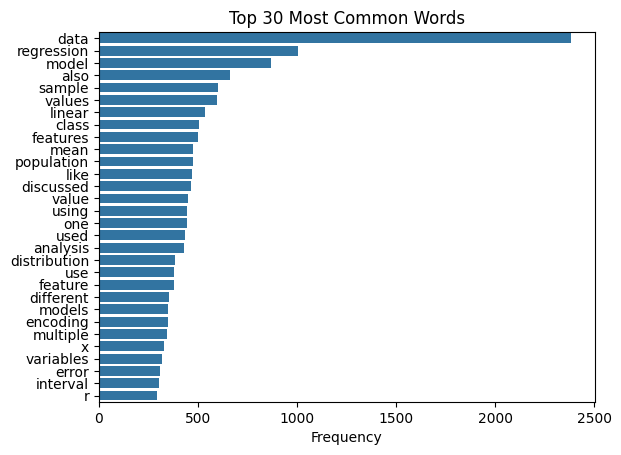

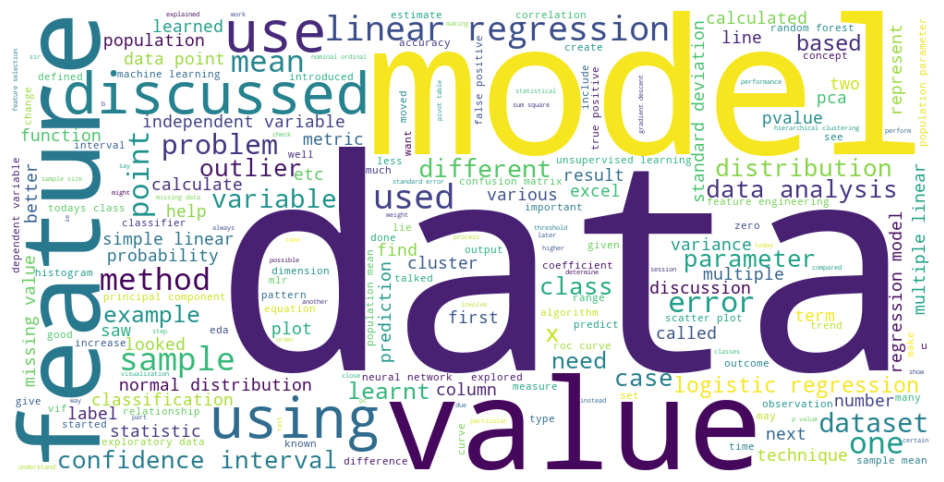

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud
from collections import Counter
from nltk.corpus import stopwords
nltk.download('stopwords')

# Load Excel file
df = pd.read_excel(r"D:\IITB\Studies\6th Sem\DS 203 Programming for Data Science\Project\Session-Summary-for-E6-project.xlsx")

df.head()

print(df.info())
print(df['Session_Summary'].isnull().sum(), "null values")
print(df['Session_Summary'].duplicated().sum(), "duplicates")

df['char_count'] = df['Session_Summary'].astype(str).apply(len)
df['word_count'] = df['Session_Summary'].astype(str).apply(lambda x: len(x.split()))

# Summary stats
print(df[['char_count', 'word_count']].describe())

# Plot
sns.histplot(df['word_count'], bins=40, kde=True)
plt.title("Distribution of Word Count per Session Summary")
plt.show()


# Plot
sns.histplot(df['char_count'], bins=40, kde=True)
plt.title("Distribution of Char Count per Session Summary")
plt.show()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['cleaned_text'] = df['Session_Summary'].astype(str).apply(clean_text)

stop_words = set(stopwords.words('english'))
all_words = ' '.join(df['cleaned_text']).split()
filtered_words = [word for word in all_words if word not in stop_words]

word_freq = Counter(filtered_words)
top_words = word_freq.most_common(30)

# Plot top words
words, counts = zip(*top_words)
sns.barplot(x=list(counts), y=list(words))
plt.title("Top 30 Most Common Words")
plt.xlabel("Frequency")
plt.show()

wc = WordCloud(width=1000, height=500, background_color='white').generate(' '.join(filtered_words))
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\m5cg1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\m5cg1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


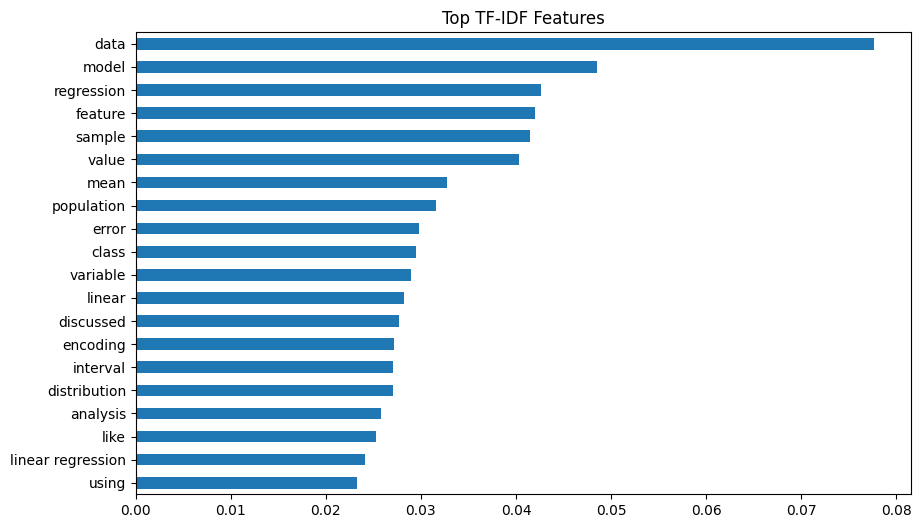

╒════╤═══════════╤════════╤═══════════╤════════════╤══════════════════╤══════════════════╤═════════════════╤═══════╤══════════╤═════════════╤═══════════════╤═══════════╤═════════════╤════════════╤══════════════════╤══════════════════════╤════════════╤═══════════════════════╤══════════════╤═══════════╤══════════╤═══════════════╤═══════════════════╤════════════════════╤════════════════╤════════════╤═══════════╤═══════════════╤════════════════╤══════════╤═══════════╤══════════════════╤════════════╤════════════════════════╤══════════════╤════════════════╤═══════════╤═════════════╤══════════════╤══════════╤════════════╤═════════════════════╤═════════════╤════════════╤═════════════╤═════════════════╤══════════╤════════════╤════════════════════╤══════════╤═════════╤═══════╤═══════════╤═══════╤═══════════╤═══════╤═══════════╤═════════════╤══════════════════╤══════════════════╤═════════╤═══════════╤══════════╤═══════════════╤═══════════╤════════════════╤════════════╤═════════════╤════════════╤═

In [38]:
# Text EDA Pipeline for Session Summaries Classification

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import PCA, LatentDirichletAllocation
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity

import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter

# -------------------------------
# Load & Initial Preprocessing
# -------------------------------
df = pd.read_excel("D:/IITB/Studies/6th Sem/DS 203 Programming for Data Science/Project/Session-Summary-for-E6-project.xlsx")

nltk.download('stopwords')
nltk.download('wordnet')
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    words = text.split()
    words = [lemmatizer.lemmatize(w) for w in words if w not in stop_words]
    return ' '.join(words)

df['cleaned_text'] = df['Session_Summary'].apply(clean_text)

# -------------------------------
# Text Length Features
# -------------------------------
df['char_count'] = df['Session_Summary'].str.len()
df['word_count'] = df['Session_Summary'].apply(lambda x: len(str(x).split()))
df['avg_word_length'] = df['char_count'] / df['word_count']

# -------------------------------
# TF-IDF and N-gram Analysis
# -------------------------------
tfidf = TfidfVectorizer(max_features=3000, ngram_range=(1,2), stop_words='english')
X_tfidf = tfidf.fit_transform(df['cleaned_text'])

tfidf_scores = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())
tfidf_mean = tfidf_scores.mean().sort_values(ascending=False)
tfidf_mean.head(20).plot(kind='barh', figsize=(10,6), title='Top TF-IDF Features')
plt.gca().invert_yaxis()
plt.show()

import pandas as pd


from tabulate import tabulate

# View only first few rows for readability
preview_tfidf = tfidf_scores.head(5)  # change to .iloc[[0]] for a specific summary

# Convert to tabular string format
print(tabulate(preview_tfidf, headers='keys', tablefmt='fancy_grid', showindex=True))




### in the library TFIDF is calculated as TF*IDF and not as TF*IDF + 1 as in slides 

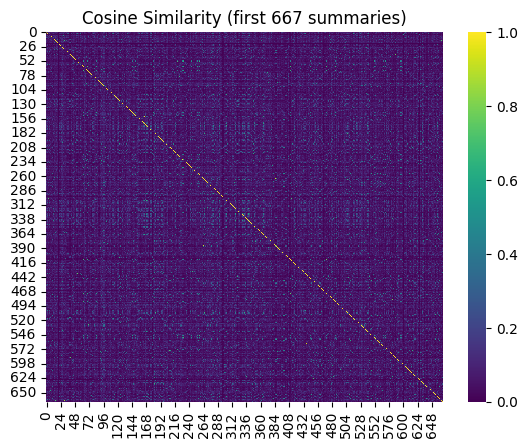

In [47]:
# -------------------------------
# Cosine Similarity Heatmap
# -------------------------------
sim_matrix = cosine_similarity(X_tfidf[:667])
sns.heatmap(sim_matrix, cmap='viridis')
plt.title("Cosine Similarity (first 667 summaries)")
plt.show()



In [49]:
# -------------------------------
# KMeans Clustering
# -------------------------------
kmeans = KMeans(n_clusters= 6, random_state=42)
df['cluster'] = kmeans.fit_predict(X_tfidf)

# View top words per cluster
for i in range(6):
    print(f"\nCluster {i} top words:")
    cluster_words = ' '.join(df[df['cluster'] == i]['cleaned_text']).split()
    print(Counter(cluster_words).most_common(10))

from sklearn.metrics import silhouette_score

sil_score = silhouette_score(X_tfidf, df['cluster'])
print(f"Silhouette Score: {sil_score:.2f}")

from sklearn.metrics import silhouette_score

scores = []
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    preds = kmeans.fit_predict(X_tfidf)
    score = silhouette_score(X_tfidf, preds)
    scores.append((k, score))

for k, s in scores:
    print(f"k={k}, Silhouette Score={s:.3f}")



Cluster 0 top words:
[('the', 2557), ('of', 1223), ('we', 932), ('and', 895), ('a', 747), ('is', 712), ('to', 703), ('in', 434), ('sample', 426), ('regression', 404)]

Cluster 1 top words:
[('the', 2206), ('data', 1251), ('we', 1187), ('and', 1186), ('to', 975), ('of', 971), ('in', 647), ('a', 609), ('is', 526), ('for', 400)]

Cluster 2 top words:
[('the', 1129), ('we', 548), ('of', 499), ('and', 494), ('to', 467), ('is', 417), ('a', 381), ('in', 231), ('that', 169), ('clustering', 157)]

Cluster 3 top words:
[('the', 441), ('and', 386), ('of', 308), ('is', 270), ('we', 254), ('data', 187), ('to', 168), ('in', 159), ('a', 151), ('learning', 140)]

Cluster 4 top words:
[('the', 1796), ('we', 973), ('and', 852), ('of', 847), ('to', 818), ('a', 583), ('is', 574), ('in', 526), ('data', 406), ('that', 302)]

Cluster 5 top words:
[('the', 395), ('encoding', 322), ('of', 234), ('we', 206), ('and', 193), ('to', 179), ('is', 145), ('in', 135), ('for', 123), ('a', 103)]
Silhouette Score: 0.05
k

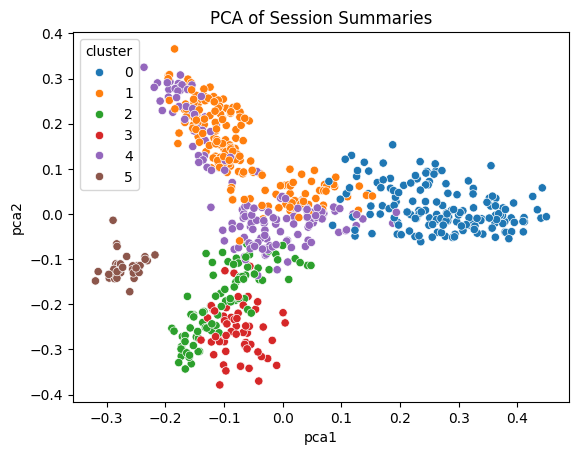

In [40]:
# -------------------------------
# PCA for 2D Visualization
# -------------------------------
pca = PCA(n_components=2)
reduced = pca.fit_transform(X_tfidf.toarray())
df['pca1'] = reduced[:, 0]
df['pca2'] = reduced[:, 1]

sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='tab10')
plt.title("PCA of Session Summaries")
plt.show()




#### T-SNE plot 

c:\Users\m5cg1\anaconda3\envs\ML_env\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


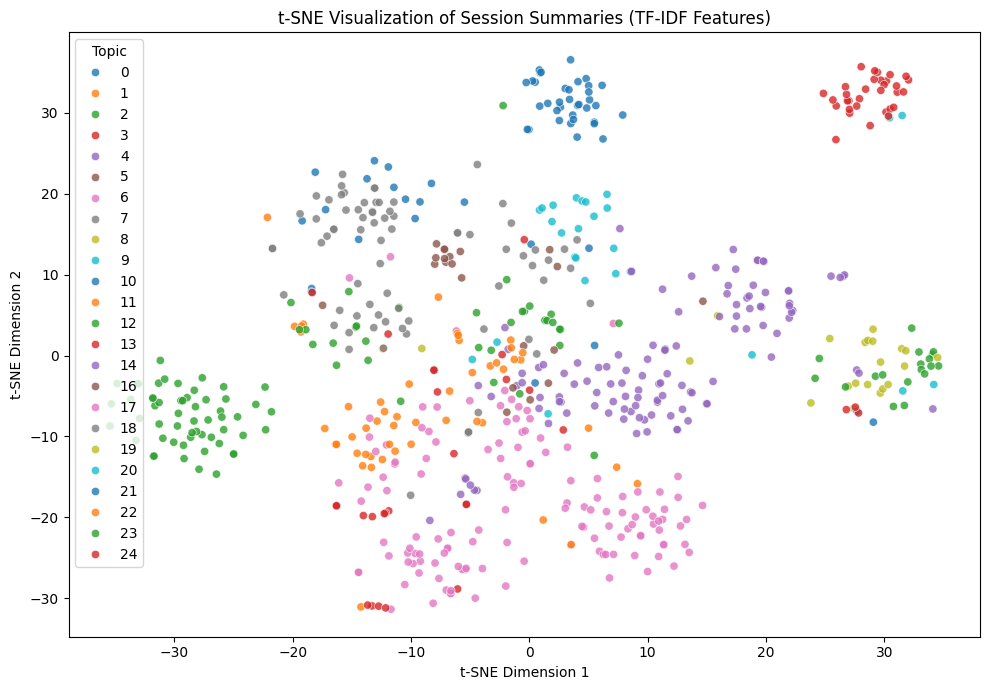

In [45]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Use the earlier TF-IDF matrix (X_tfidf from previous step)

# Reduce to 2D using t-SNE
tsne_model = TSNE(n_components=2, perplexity=15, random_state=42, n_iter=1000)
tsne_result = tsne_model.fit_transform(X_tfidf.toarray())

# Create DataFrame for plotting
df['tsne-2d-one'] = tsne_result[:, 0]
df['tsne-2d-two'] = tsne_result[:, 1]


plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='tsne-2d-one', y='tsne-2d-two',
    hue='Dominant_Topic',
    palette='tab10',
    data=df,
    legend='full',
    alpha=0.8
)
plt.title('t-SNE Visualization of Session Summaries (TF-IDF Features)')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend(title='Topic')
plt.tight_layout()
plt.show()


In [42]:
# -------------------------------
# Topic Modeling with LDA
# -------------------------------
count_vectorizer = CountVectorizer(stop_words='english')
X_count = count_vectorizer.fit_transform(df['cleaned_text'])

lda = LatentDirichletAllocation(n_components=25, random_state=42)
lda.fit(X_count)

print("\nLDA Topics:")
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx+1}: ", [count_vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])


LDA Topics:
Topic 1:  ['sigmoid', 'outcome', 'accuracy', 'probability', 'using', 'logistic', 'regression', 'model', 'function', 'weight']
Topic 2:  ['like', 'discussion', 'average', 'summary', 'analysis', 'count', 'class', 'data', 'pivot', 'table']
Topic 3:  ['unexplained', 'using', 'strength', 'categorization', 'higher', 'better', 'multiple', 'variable', 'model', 'fvalue']
Topic 4:  ['measurement', 'label', 'level', 'ordinal', 'interval', 'ratio', 'nominal', 'regression', 'learning', 'data']
Topic 5:  ['learnt', 'student', 'feature', 'talked', 'started', 'bit', 'summary', 'submission', 'saw', 'discussed']
Topic 6:  ['column', 'vif', 'dataset', 'discussed', 'dimensionality', 'problem', 'sir', 'value', 'feature', 'data']
Topic 7:  ['submission', 'trend', 'discussion', 'line', 'analysis', 'insight', 'plot', 'studied', 'inference', 'data']
Topic 8:  ['submission', 'sir', 'talked', 'plot', 'class', 'number', 'analysis', 'dataset', 'summary', 'data']
Topic 9:  ['line', 'variable', 'error',

In [43]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Step 1: Load and preprocess your data
df = pd.read_excel(r"D:\IITB\Studies\6th Sem\DS 203 Programming for Data Science\Project\Session-Summary-for-E6-project.xlsx")
df['cleaned_text'] = df['Session_Summary'].str.lower().str.replace(r'[^a-z\s]', '', regex=True)

# Step 2: Vectorize and fit LDA
count_vectorizer = CountVectorizer(stop_words='english')
X_count = count_vectorizer.fit_transform(df['cleaned_text'])

lda = LatentDirichletAllocation(n_components=25, random_state=42)
lda_output = lda.fit_transform(X_count)

# Step 3: Assign dominant topic to each summary
df['Dominant_Topic'] = lda_output.argmax(axis=1)
df['Topic_Confidence'] = lda_output.max(axis=1)


In [44]:
from tabulate import tabulate

# Display only a few relevant columns (you can change as needed)
print(tabulate(df[['SerialNo', 'Dominant_Topic', 'Topic_Confidence']], headers='keys', tablefmt='grid'))


+-----+------------+------------------+--------------------+
|     |   SerialNo |   Dominant_Topic |   Topic_Confidence |
+=====+============+==================+====================+
|   0 |          1 |               17 |           0.422904 |
+-----+------------+------------------+--------------------+
|   1 |          2 |               13 |           0.994637 |
+-----+------------+------------------+--------------------+
|   2 |          3 |               17 |           0.994182 |
+-----+------------+------------------+--------------------+
|   3 |          4 |                4 |           0.654626 |
+-----+------------+------------------+--------------------+
|   4 |          5 |               21 |           0.442796 |
+-----+------------+------------------+--------------------+
|   5 |          6 |               17 |           0.761503 |
+-----+------------+------------------+--------------------+
|   6 |          7 |                3 |           0.464277 |
+-----+------------+----

In [17]:
# Group by dominant topic and collect SerialNos
topic_groups = df.groupby('Dominant_Topic')['SerialNo'].apply(list)

# Display topic-wise SerialNos and count
for topic_num, serials in topic_groups.items():
    print(f"\n Topic {topic_num + 1} | Total Sessions: {len(serials)}")
    print(serials)



 Topic 1 | Total Sessions: 2
[442, 467]

 Topic 2 | Total Sessions: 40
[35, 42, 43, 117, 123, 129, 140, 142, 173, 188, 189, 194, 236, 243, 246, 249, 250, 252, 275, 285, 311, 339, 362, 367, 402, 410, 433, 457, 471, 482, 489, 497, 505, 511, 553, 568, 584, 602, 649, 650]

 Topic 3 | Total Sessions: 55
[34, 37, 46, 57, 84, 91, 115, 125, 130, 154, 165, 168, 172, 187, 191, 217, 242, 254, 265, 268, 278, 288, 299, 335, 346, 357, 364, 373, 385, 386, 388, 403, 404, 420, 446, 452, 454, 460, 462, 479, 481, 485, 488, 510, 513, 525, 554, 555, 591, 595, 610, 620, 621, 655, 660]

 Topic 4 | Total Sessions: 18
[7, 30, 47, 51, 69, 276, 334, 336, 342, 363, 443, 461, 475, 477, 509, 524, 544, 560]

 Topic 5 | Total Sessions: 77
[4, 9, 21, 39, 48, 60, 65, 66, 72, 74, 82, 87, 97, 98, 103, 128, 139, 148, 152, 155, 163, 164, 185, 192, 199, 201, 204, 213, 226, 228, 234, 244, 253, 263, 271, 272, 277, 287, 294, 300, 301, 307, 312, 317, 359, 368, 369, 380, 384, 387, 390, 392, 395, 413, 417, 428, 444, 448, 468, 47

In [18]:
from tabulate import tabulate

# Count the number of sessions per dominant topic
topic_counts = df['Dominant_Topic'].value_counts().sort_index()

# Convert to a DataFrame for tabulate
topic_table = pd.DataFrame({
    'Topic Number': topic_counts.index + 1,  # Adjusting to 1-based index
    'Number of Sessions': topic_counts.values
})

# Display the table
print(tabulate(topic_table, headers='keys', tablefmt='fancy_grid', showindex=False))


╒════════════════╤══════════════════════╕
│   Topic Number │   Number of Sessions │
╞════════════════╪══════════════════════╡
│              1 │                    2 │
├────────────────┼──────────────────────┤
│              2 │                   40 │
├────────────────┼──────────────────────┤
│              3 │                   55 │
├────────────────┼──────────────────────┤
│              4 │                   18 │
├────────────────┼──────────────────────┤
│              5 │                   77 │
├────────────────┼──────────────────────┤
│              6 │                    2 │
├────────────────┼──────────────────────┤
│              7 │                    3 │
├────────────────┼──────────────────────┤
│              8 │                   63 │
├────────────────┼──────────────────────┤
│              9 │                    1 │
├────────────────┼──────────────────────┤
│             10 │                   20 │
├────────────────┼──────────────────────┤
│             11 │                

### Connecting session with their sessions using TF-IDF and Word2Vec using CBOW

1> Using Word2Vec

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\m5cg1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\m5cg1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\m5cg1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Silhouette Score: 0.483


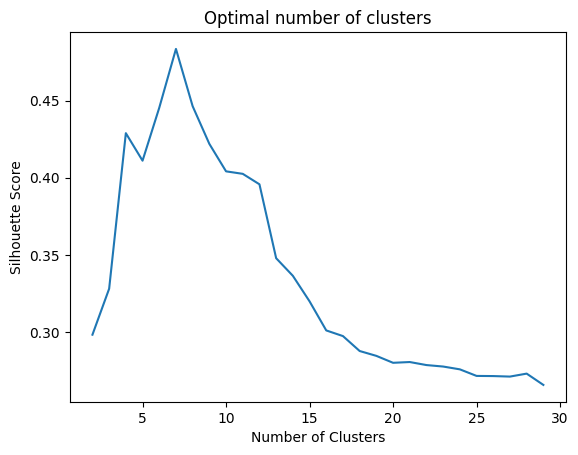

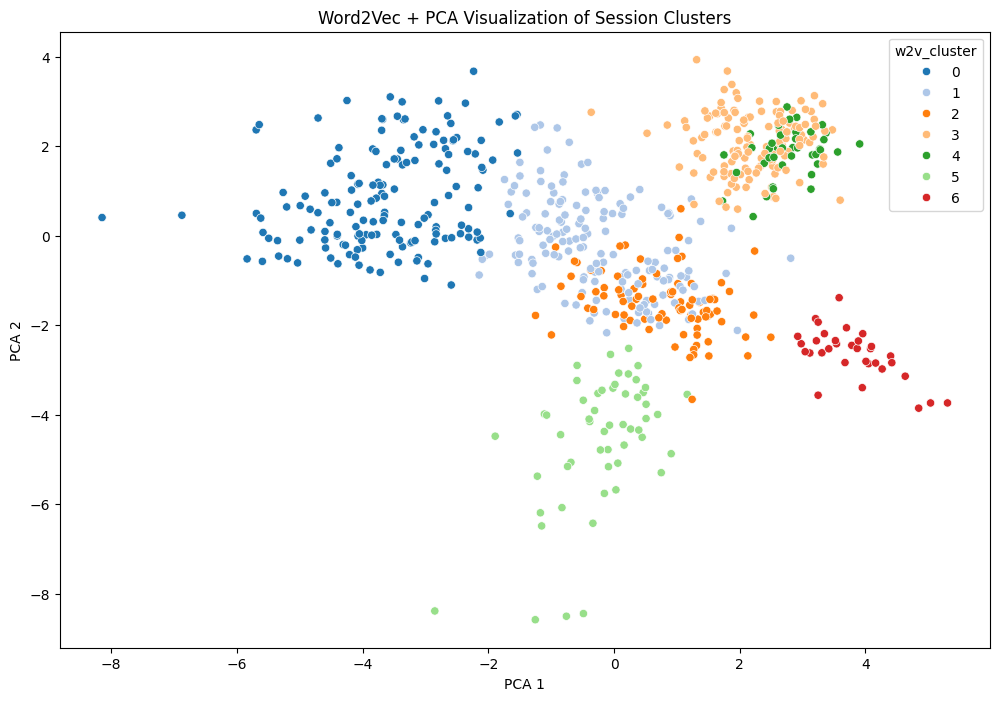


Cluster 0 (157 summaries):
[  3   6   7  13  18  20  23  24  25  26  30  36  38  42  43  44  47  51
  53  58  59  69  78  79  80  86  94 102 107 112 113 114 118 120 122 123
 129 137 140 153 156 157 161 162 166 169 171 173 175 176 177 182 184 188
 189 194 196 197 205 212 218 222 236 243 246 249 250 251 260 267 280 282
 285 289 291 292 302 304 308 310 316 319 321 323 325 328 330 331 332 333
 334 336 339 341 342 348 351 353 363 366 370 376 379 398 400 405 410 418
 429 430 433 435 436 443 453 456 458 463 477 482 486 492 503 505 507 508
 509 517 519 522 524 529 531 541 542 558 560 568 569 572 576 581 584 600
 602 603 615 619 623 629 633 643 653 654 658 664 668]

Cluster 1 (157 summaries):
[  1   4   5   9  10  16  21  31  35  39  48  55  56  60  61  62  65  66
  72  73  74  82  87  96  97  98 103 108 117 121 128 134 136 139 142 148
 152 155 163 164 170 185 190 192 195 199 201 204 207 213 216 224 226 228
 233 234 235 244 247 248 252 253 261 262 269 271 272 275 276 277 281 287
 294 300 301 3

In [ ]:
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from sklearn.metrics import silhouette_score
from collections import defaultdict

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# ------------------------
# 1. Load Data
# ------------------------
df = pd.read_excel("D:/IITB/Studies/6th Sem/DS 203 Programming for Data Science/Project/Session-Summary-for-E6-project.xlsx")
df = df.dropna(subset=['Session_Summary'])

# ------------------------
# 2. Preprocessing
# ------------------------
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w.isalpha() and w not in stop_words]
    return tokens

df['tokens'] = df['Session_Summary'].apply(clean_text)

# ------------------------
# 3. Train Word2Vec Model (CBOW)
# ------------------------
w2v_model = Word2Vec(sentences=df['tokens'], vector_size=300, window=300, min_count=2, sg=0, workers=4, seed=42)

# ------------------------
# 4. Average Word Vectors for Each Summary
# ------------------------
def get_avg_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

df['vector'] = df['tokens'].apply(lambda x: get_avg_vector(x, w2v_model))
X_w2v = np.vstack(df['vector'].values)  # <-- unified variable name here

# ------------------------
# 5. KMeans Clustering (25 sessions)
# ------------------------
kmeans = KMeans(n_clusters= 7, random_state=42)
df['w2v_cluster'] = kmeans.fit_predict(X_w2v)

# Silhouette Score
sil_score = silhouette_score(X_w2v, df['w2v_cluster'])
print(f"Silhouette Score: {sil_score:.3f}")

scores = []
for k in range(2, 30):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_w2v)
    score = silhouette_score(X_w2v, labels)
    scores.append(score)

plt.plot(range(2, 30), scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Optimal number of clusters")
plt.show()


# ------------------------
# 6. Visualize using PCA
# ------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_w2v)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['w2v_cluster'], palette='tab20', legend='full')
plt.title("Word2Vec + PCA Visualization of Session Clusters")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# ------------------------
# 7. Group Serial Numbers by Cluster
# ------------------------
cluster_groups = defaultdict(list)

for idx, row in df.iterrows():
    cluster_id = row['w2v_cluster']
    serial_no = row['SerialNo']
    cluster_groups[cluster_id].append(serial_no)

# Convert to list of arrays
session_clusters = [np.array(cluster_groups[i]) for i in range(25)]

# Display the grouped arrays
for i, cluster in enumerate(session_clusters):
    print(f"\nCluster {i} ({len(cluster)} summaries):")
    print(cluster)


Word2Vec - clusterring using DBSCAN


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\m5cg1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\m5cg1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\m5cg1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Number of clusters found by DBSCAN: 1
Silhouette Score not applicable — only one cluster found.


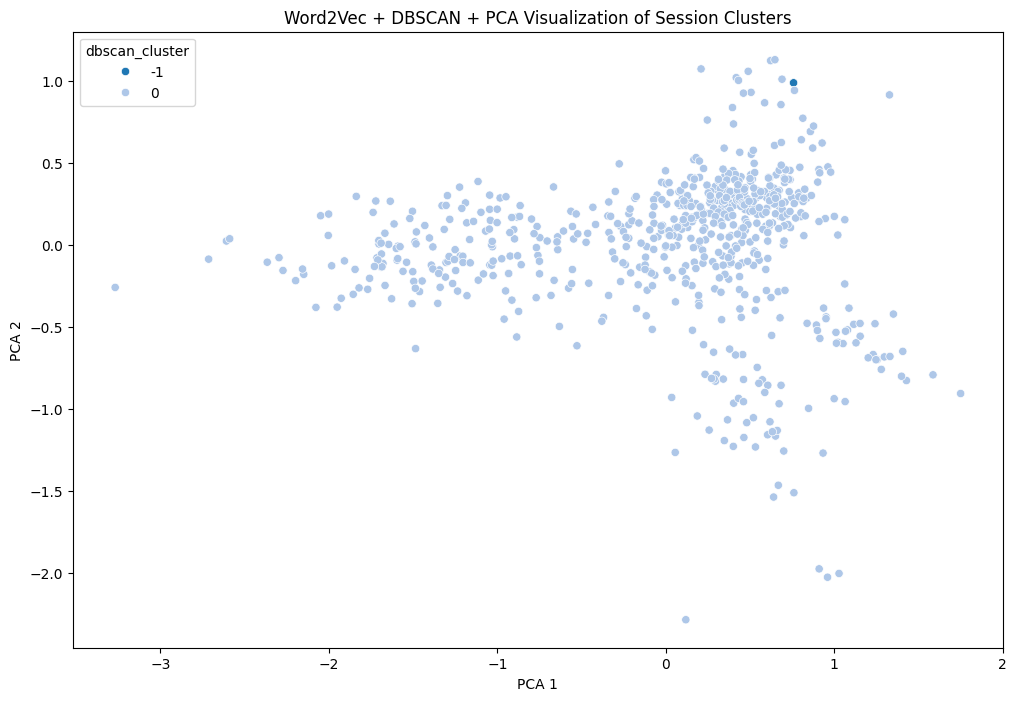


Cluster 0 (1 summaries):
[21]

Cluster 1 (667 summaries):
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55
  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 

In [35]:
# ================================
# 1. Imports & NLTK Downloads
# ================================
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from sklearn.metrics import silhouette_score
from collections import defaultdict

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# ================================
# 2. Load Data
# ================================
df = pd.read_excel("D:/IITB/Studies/6th Sem/DS 203 Programming for Data Science/Project/Session-Summary-for-E6-project.xlsx")
df = df.dropna(subset=['Session_Summary'])

# ================================
# 3. Preprocessing
# ================================
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w.isalpha() and w not in stop_words]
    return tokens

df['tokens'] = df['Session_Summary'].apply(clean_text)

# ================================
# 4. Train Word2Vec Model (CBOW)
# ================================
w2v_model = Word2Vec(sentences=df['tokens'], vector_size= 70, window=10, min_count=2, sg=0, workers=4, seed=42)

# ================================
# 5. Average Word Vectors for Each Summary
# ================================
def get_avg_vector(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

df['vector'] = df['tokens'].apply(lambda x: get_avg_vector(x, w2v_model))
X_w2v = np.vstack(df['vector'].values)

# ================================
# 6. DBSCAN Clustering
# ================================
# Play with eps (try 3 to 15 for 300-dim vectors)
dbscan = DBSCAN(eps= 0.3, min_samples=3, metric='cosine')
df['dbscan_cluster'] = dbscan.fit_predict(X_w2v)

n_clusters = len(set(df['dbscan_cluster'])) - (1 if -1 in df['dbscan_cluster'].values else 0)
print(f"Number of clusters found by DBSCAN: {n_clusters}")

if n_clusters > 1:
    sil_score = silhouette_score(X_w2v, df['dbscan_cluster'])
    print(f"Silhouette Score: {sil_score:.3f}")
else:
    print("Silhouette Score not applicable — only one cluster found.")

# ================================
# 7. PCA Visualization
# ================================
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_w2v)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['dbscan_cluster'], palette='tab20', legend='full')
plt.title("Word2Vec + DBSCAN + PCA Visualization of Session Clusters")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# ================================
# 8. Group Serial Numbers by Cluster
# ================================
cluster_groups = defaultdict(list)

for idx, row in df.iterrows():
    cluster_id = row['dbscan_cluster']
    serial_no = row['SerialNo']
    cluster_groups[cluster_id].append(serial_no)

# Convert to list of arrays
session_clusters = []
for cluster_id in sorted(cluster_groups.keys()):
    session_clusters.append(np.array(cluster_groups[cluster_id]))

# Display the grouped arrays
for i, cluster in enumerate(session_clusters):
    print(f"\nCluster {i} ({len(cluster)} summaries):")
    print(cluster)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\m5cg1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\m5cg1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\m5cg1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Silhouette Score: 0.450


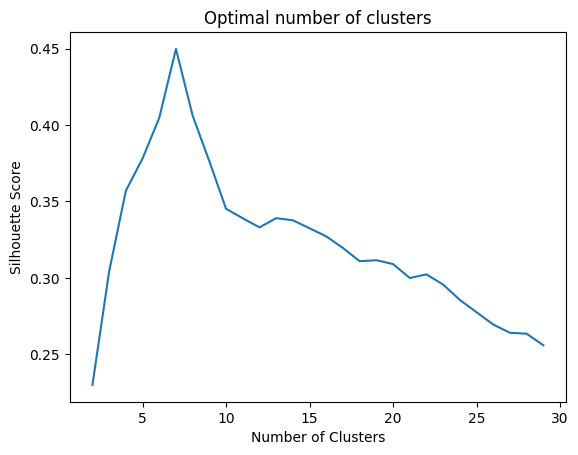

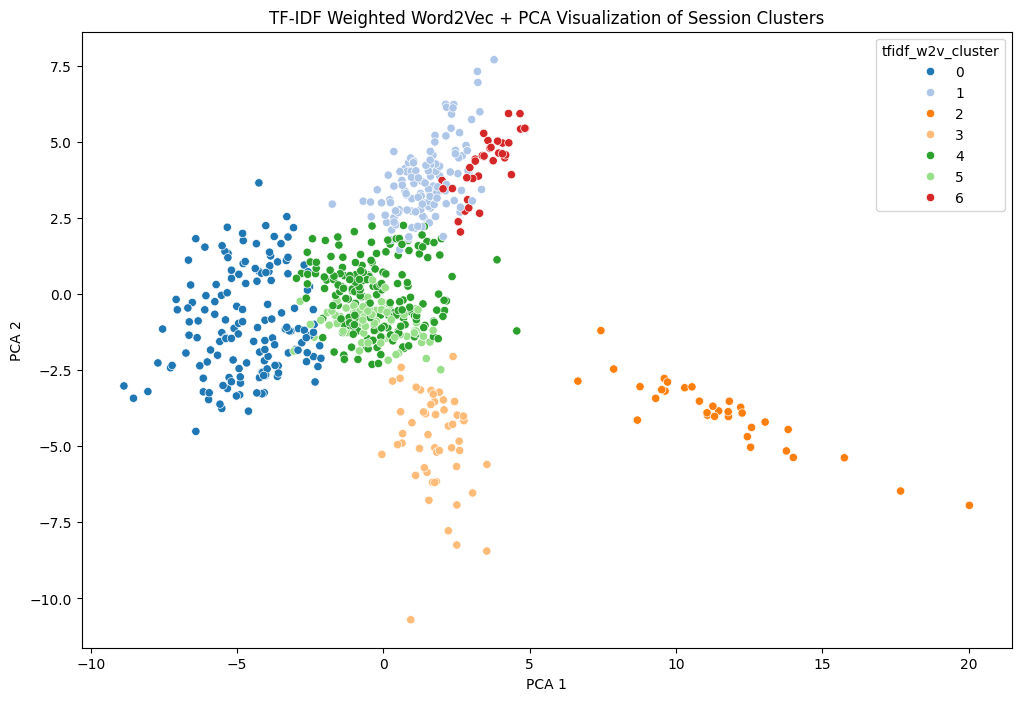


Cluster 0 (152 summaries):
[  3   6   7  13  20  23  24  25  26  30  36  38  42  44  47  51  53  58
  59  69  78  79  80  86  94 102 107 112 113 114 118 120 122 123 129 137
 140 153 156 157 161 162 164 166 169 171 173 175 176 177 182 184 188 189
 194 196 197 205 212 218 222 236 243 246 250 251 260 267 280 282 285 289
 291 292 302 304 308 310 316 319 321 323 325 328 330 331 332 333 334 339
 341 342 348 351 353 363 366 370 376 379 400 405 410 418 429 430 433 435
 436 443 453 456 458 463 477 482 486 492 503 505 507 508 509 517 522 524
 529 531 541 542 558 560 568 569 572 576 581 584 602 603 615 619 623 629
 633 643 649 653 654 658 664 668]

Cluster 1 (124 summaries):
[ 12  15  17  28  29  50  61  64  67  75  77  81  88  92  95 101 104 105
 106 109 111 116 132 133 138 141 144 147 150 160 178 183 186 193 198 200
 211 219 223 225 229 240 241 259 266 284 286 293 295 314 315 318 347 350
 352 354 358 360 361 371 374 377 378 381 382 389 391 393 394 397 408 412
 415 424 426 427 432 434 441 451 4

In [20]:
# ================================
# 1. Imports & NLTK Downloads
# ================================
import pandas as pd
import numpy as np
from gensim.models import Word2Vec
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# ================================
# 2. Load Data
# ================================
df = pd.read_excel("D:/IITB/Studies/6th Sem/DS 203 Programming for Data Science/Project/Session-Summary-for-E6-project.xlsx")
df = df.dropna(subset=['Session_Summary'])

# ================================
# 3. Preprocessing
# ================================
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w.isalpha() and w not in stop_words]
    return tokens

df['tokens'] = df['Session_Summary'].apply(clean_text)

# ================================
# 4. Train Word2Vec Model (CBOW)
# ================================
w2v_model = Word2Vec(sentences=df['tokens'], vector_size=300, window=300, min_count=2, sg=0, workers=4, seed=42)

# ================================
# 5. Prepare TF-IDF Model
# ================================
df['joined_tokens'] = df['tokens'].apply(lambda x: ' '.join(x))
tfidf = TfidfVectorizer()
tfidf.fit(df['joined_tokens'])

# Create TF-IDF dict for each document
tfidf_dicts = []
for doc in df['joined_tokens']:
    response = tfidf.transform([doc])
    feature_names = tfidf.get_feature_names_out()
    word_scores = {feature_names[i]: response[0, i] for i in response.nonzero()[1]}
    tfidf_dicts.append(word_scores)

# ================================
# 6. Compute TF-IDF Weighted Word2Vec Averages
# ================================
def get_tfidf_weighted_vector(tokens, model, tfidf_dict):
    vectors = []
    weights = []
    for word in tokens:
        if word in model.wv and word in tfidf_dict:
            vectors.append(model.wv[word] * tfidf_dict[word])
            weights.append(tfidf_dict[word])
    if vectors:
        return np.sum(vectors, axis=0) / np.sum(weights)
    else:
        return np.zeros(model.vector_size)

df['tfidf_vector'] = [get_tfidf_weighted_vector(tokens, w2v_model, tfidf_dict)
                      for tokens, tfidf_dict in zip(df['tokens'], tfidf_dicts)]

X_tfidf_w2v = np.vstack(df['tfidf_vector'].values)

# ================================
# 7. KMeans Clustering
# ================================
n_clusters = 7
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['tfidf_w2v_cluster'] = kmeans.fit_predict(X_tfidf_w2v)

#
# Silhouette Score
sil_score = silhouette_score(X_tfidf_w2v, df['tfidf_w2v_cluster'])
print(f"Silhouette Score: {sil_score:.3f}")

scores = []
for k in range(2, 30):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_tfidf_w2v)
    score = silhouette_score(X_tfidf_w2v, labels)
    scores.append(score)

plt.plot(range(2, 30), scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Optimal number of clusters")
plt.show()


# ================================
# 8. PCA Visualization
# ================================
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf_w2v)

plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['tfidf_w2v_cluster'], palette='tab20', legend='full')
plt.title("TF-IDF Weighted Word2Vec + PCA Visualization of Session Clusters")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# ================================
# 9. Group Serial Numbers by Cluster
# ================================
cluster_groups = defaultdict(list)
for idx, row in df.iterrows():
    cluster_id = row['tfidf_w2v_cluster']
    serial_no = row['SerialNo']
    cluster_groups[cluster_id].append(serial_no)

# Convert to list of arrays
session_clusters = []
for cluster_id in sorted(cluster_groups.keys()):
    session_clusters.append(np.array(cluster_groups[cluster_id]))

# Display grouped arrays
for i, cluster in enumerate(session_clusters):
    print(f"\nCluster {i} ({len(cluster)} summaries):")
    print(cluster)


2> TFIDF using K-Means 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\m5cg1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\m5cg1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\m5cg1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Silhouette Score: 0.055


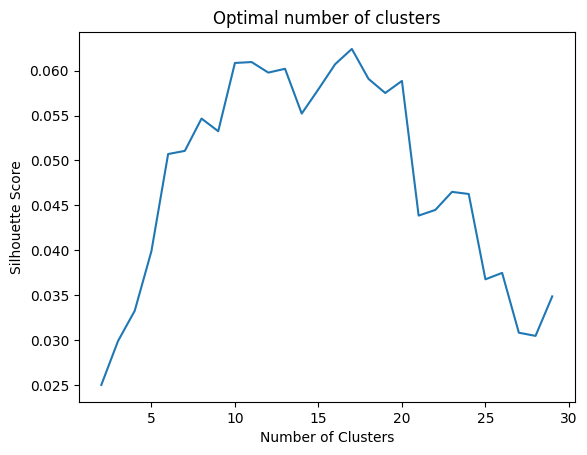

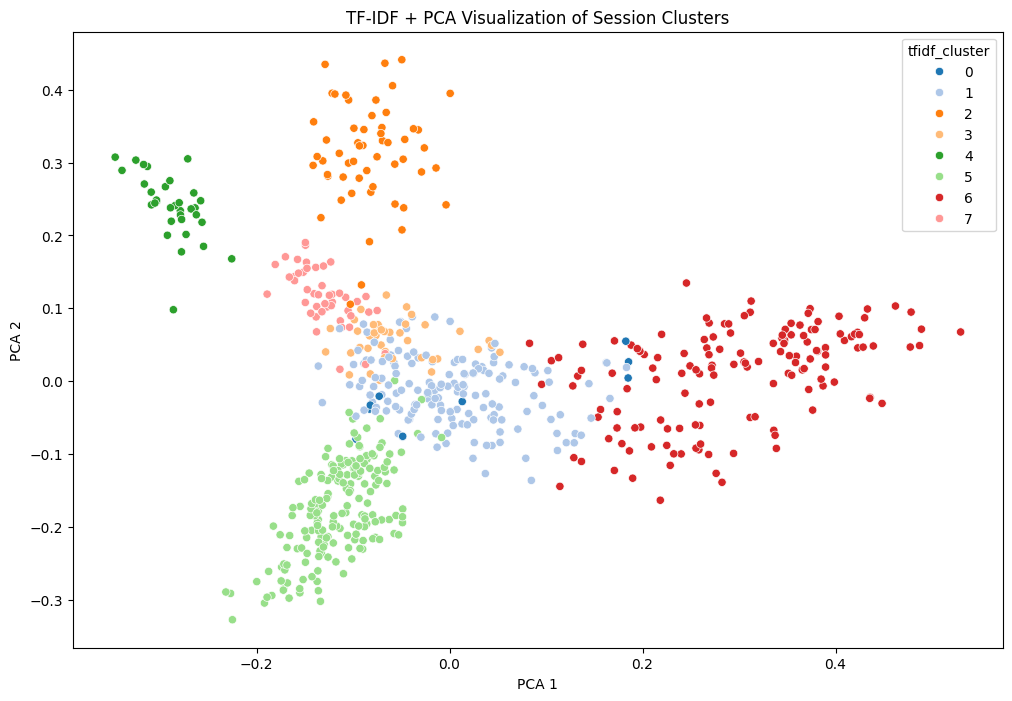


Cluster 0 (10 summaries):
[  5  42 119 247 251 312 466 581 601 628]

Cluster 1 (158 summaries):
[  1   4   9  10  16  18  31  35  39  48  55  56  60  61  62  65  66  72
  73  74  79  82  87  96  97  98 103 107 108 117 123 128 134 136 139 142
 148 152 155 163 170 185 190 192 195 199 201 204 207 213 216 224 226 228
 233 234 235 244 248 249 252 253 261 262 271 272 275 276 277 281 287 294
 300 301 306 307 309 311 317 327 329 336 340 343 344 359 362 367 368 369
 372 376 380 384 387 390 392 395 396 398 402 413 417 419 423 428 437 438
 439 444 448 457 458 468 470 471 489 493 494 495 497 498 500 501 511 521
 527 528 530 532 534 536 540 543 550 551 553 556 559 563 565 569 570 586
 594 600 604 606 609 615 627 636 638 650 651 661 663 665]

Cluster 2 (55 summaries):
[ 34  37  46  57  84  91 115 125 154 165 168 172 187 191 217 242 254 265
 268 278 288 299 335 346 357 364 373 385 386 388 403 404 420 446 452 454
 459 460 462 479 481 485 488 510 513 525 554 555 591 595 610 620 621 655
 660]

Cluster 

In [21]:

# ================================
# 1. Imports & NLTK Downloads
# ================================
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# ================================
# 2. Load Data
# ================================
df = pd.read_excel("D:/IITB/Studies/6th Sem/DS 203 Programming for Data Science/Project/Session-Summary-for-E6-project.xlsx")
df = df.dropna(subset=['Session_Summary'])

# ================================
# 3. Preprocessing
# ================================
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w.isalpha() and w not in stop_words]
    return ' '.join(tokens)  # Note: return string for TF-IDF

df['clean_summary'] = df['Session_Summary'].apply(clean_text)

# ================================
# 4. TF-IDF Vectorization
# ================================
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['clean_summary'])

# ================================
# 5. KMeans Clustering
# ================================
n_clusters = 8
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['tfidf_cluster'] = kmeans.fit_predict(X_tfidf)

# Silhouette Score
# Silhouette Score
sil_score = silhouette_score(X_tfidf, df['tfidf_cluster'])
print(f"Silhouette Score: {sil_score:.3f}")

scores = []
for k in range(2, 30):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_tfidf)
    score = silhouette_score(X_tfidf, labels)
    scores.append(score)

plt.plot(range(2, 30), scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Optimal number of clusters")
plt.show()

# ================================
# 6. PCA Visualization
# ================================
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())  # convert sparse to dense for PCA

plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['tfidf_cluster'], palette='tab20', legend='full')
plt.title("TF-IDF + PCA Visualization of Session Clusters")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# ================================
# 7. Group Serial Numbers by Cluster
# ================================
cluster_groups = defaultdict(list)
for idx, row in df.iterrows():
    cluster_id = row['tfidf_cluster']
    serial_no = row['SerialNo']
    cluster_groups[cluster_id].append(serial_no)

# Convert to list of arrays
session_clusters = []
for cluster_id in sorted(cluster_groups.keys()):
    session_clusters.append(np.array(cluster_groups[cluster_id]))

# Display grouped arrays
for i, cluster in enumerate(session_clusters):
    print(f"\nCluster {i} ({len(cluster)} summaries):")
    print(cluster)


TFIDF using DBSCAN

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\m5cg1\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\m5cg1\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\m5cg1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Number of clusters found by DBSCAN: 1
Silhouette Score not applicable — only one cluster found.


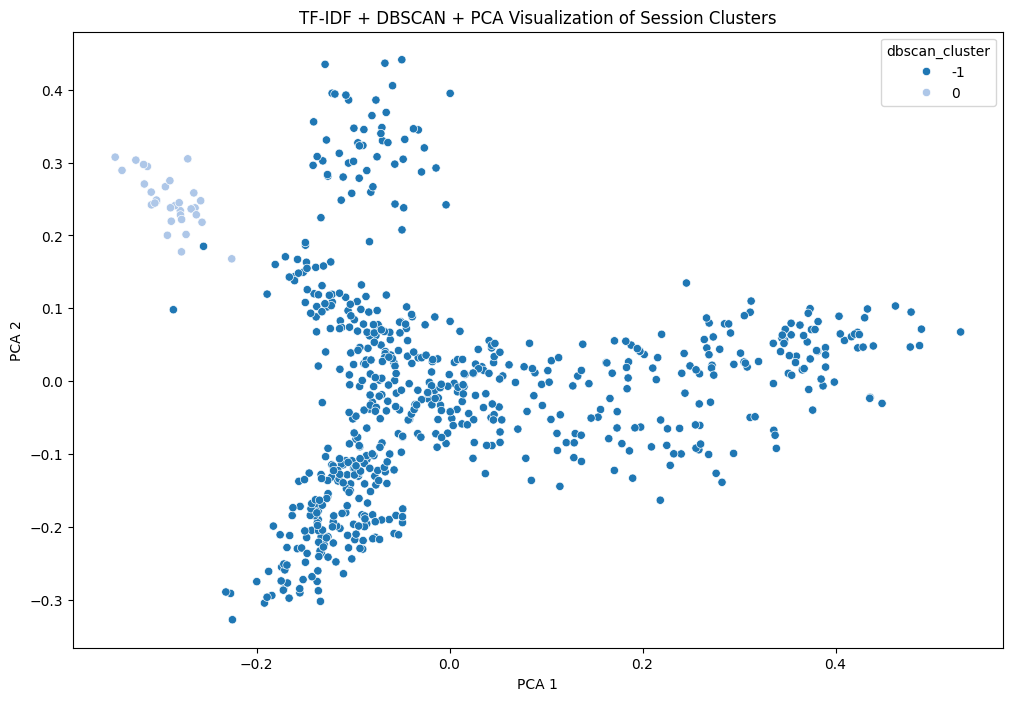


Cluster 0 (637 summaries):
[  1   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19
  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  53  55  56  57
  58  59  60  61  62  64  65  66  67  68  69  72  73  74  75  76  77  78
  79  80  81  82  83  84  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133
 134 135 136 137 138 139 140 141 142 144 145 147 148 149 150 152 153 154
 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172
 173 174 175 176 177 178 179 180 182 183 184 185 186 187 188 189 190 191
 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209
 210 211 212 213 214 215 216 217 218 219 220 222 223 224 225 226 227 228
 229 232 233 234 235 236 237 238 239 240 241 242 243 244 246 247 248 249
 250 251 252 253 254 25

In [25]:
# ================================
# 1. Imports & NLTK Downloads
# ================================
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
from sklearn.metrics import silhouette_score
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# ================================
# 2. Load Data
# ================================
df = pd.read_excel("D:/IITB/Studies/6th Sem/DS 203 Programming for Data Science/Project/Session-Summary-for-E6-project.xlsx")
df = df.dropna(subset=['Session_Summary'])

# ================================
# 3. Preprocessing
# ================================
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(w) for w in tokens if w.isalpha() and w not in stop_words]
    return ' '.join(tokens)  # Note: return string for TF-IDF

df['clean_summary'] = df['Session_Summary'].apply(clean_text)

# ================================
# 4. TF-IDF Vectorization
# ================================
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(df['clean_summary'])

# ================================
# 5. DBSCAN Clustering
# ================================
# Note: you may need to tweak eps and min_samples based on your data
dbscan = DBSCAN(eps=0.5, min_samples= 20, metric='cosine')  # cosine similarity works well for TF-IDF
df['dbscan_cluster'] = dbscan.fit_predict(X_tfidf)

# Unique cluster labels
n_clusters = len(set(df['dbscan_cluster'])) - (1 if -1 in df['dbscan_cluster'].values else 0)
print(f"Number of clusters found by DBSCAN: {n_clusters}")

# Silhouette Score (only if there’s more than 1 cluster)
if n_clusters > 1:
    sil_score = silhouette_score(X_tfidf, df['dbscan_cluster'])
    print(f"DBSCAN Clustering Silhouette Score: {sil_score:.3f}")
else:
    print("Silhouette Score not applicable — only one cluster found.")

# ================================
# 6. PCA Visualization
# ================================
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_tfidf.toarray())

plt.figure(figsize=(12, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df['dbscan_cluster'], palette='tab20', legend='full')
plt.title("TF-IDF + DBSCAN + PCA Visualization of Session Clusters")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

# ================================
# 7. Group Serial Numbers by Cluster
# ================================
cluster_groups = defaultdict(list)
for idx, row in df.iterrows():
    cluster_id = row['dbscan_cluster']
    serial_no = row['SerialNo']
    cluster_groups[cluster_id].append(serial_no)

# Convert to list of arrays
session_clusters = []
for cluster_id in sorted(cluster_groups.keys()):
    session_clusters.append(np.array(cluster_groups[cluster_id]))

# Display grouped arrays
for i, cluster in enumerate(session_clusters):
    print(f"\nCluster {i} ({len(cluster)} summaries):")
    print(cluster)
